<a href="https://colab.research.google.com/github/skbetz54/Samuel_DATA606/blob/main/Notebooks/1_1_EDA_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Analysis - Happyface**

This notebook does a baseline exploratory analysis for the dataset from [Hugging Face](https://huggingface.co/datasets/emotion) that classifies tweets as one of six different emotions: sadness, anger, love, joy, surprise, and fear. This notebook will start with preprocessing the dataset to allow ML libraries to better work with the text data. It is then followed by a few simple graphs to try and detect different vocabularies used within each tweet to gather how the dictionaries (lexicons) for each emotion are built, which are the basis of the model's application. For example, the word "scared" is much more likely to be used in a fearful tweet when compared to a joyful tweet. 

I'll start by importing the necessary Python libraries (for both the preprocessing and EDA), followed by creating a workable dataset and EDA.

In [56]:
# Python library installations that do not come with Colab

!pip install contractions
!pip install unidecode

     |████████████████████████████████| 235 kB 4.8 MB/s 


In [58]:
# Library Imports

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torchtext
import pickle
import unidecode
import contractions

from google.colab import files, drive

## Part 1 - File Download 

This part will be changed eventually to make the code more reproducible, but for this iteration (1.0), I am uploading the text data directly from my Google Drive account. The download location can be found in the link above. 

In [18]:
# Mounting my Google Drive to allow access. Again, this will be phased out to allow reproducibility of the code within the Github repository.
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
path = "/content/gdrive/MyDrive/DATA606/Data/"
file_1 = open(path+"merged_training.pkl","rb")
df = pickle.load(file_1)

print("Column Names:\n")
print(df.columns)
print("Shape of the dataset:\n")
print(df.shape)
print("\nFirst 5 rows:")
df.head()

Column Names:

Index(['text', 'emotions'], dtype='object')
Shape of the dataset:

(416809, 2)

First 5 rows:


,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [44]:
# Changing the data type of the text data from "object" to "string"

df1['text'] = df1['text'].astype('str')

"""
--------------------
Building two dictionaries to easily transfer the different classes between ASCII characters and integers. Emotions are broken down as follows
1. fear (**main variable**)- 0 
2. anger - 1
3. sadness - 2
4. joy - 3
5. love - 4
6. surprise - 5
--------------------
"""

classes_eng = ["fear", "anger", "sadness", "joy", "love", "surprise"]

classes_to_num = {classes_eng[i]:i for i in range(len(classes_eng))}
num_to_classes = {i:classes_eng[i] for i in range(len(classes_eng))}

print(classes_to_num)
print(num_to_classes)


{'fear': 0, 'anger': 1, 'sadness': 2, 'joy': 3, 'love': 4, 'surprise': 5}
{0: 'fear', 1: 'anger', 2: 'sadness', 3: 'joy', 4: 'love', 5: 'surprise'}


In [50]:
""""
----------------------
Categorical variables are impossible to work with machine learning algorithms; 
----------------------
""" 

df['class'] = df['emotions'].map(classes_to_num)

#Sanity check to ensure that the classes_to_num dictionary was correctly mapped.
df.head()

,text,emotions,class
27383,i feel awful about it too because it s my job ...,sadness,2
110083,im alone i feel awful,sadness,2
140764,ive probably mentioned this before but i reall...,joy,3
100071,i was feeling a little low few days back,sadness,2
2837,i beleive that i am much more sensitive to oth...,love,4


## Part 2 - Preprocessing and EDA

In [83]:
for idx, txt in enumerate(df['text'][0:6]):
  print('Article %d: \n' %(idx+1),txt)

Article 1: 
 b'i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here'
Article 2: 
 b'im alone i feel awful'
Article 3: 
 b'ive probably mentioned this before but i really do feel proud of myself for actually keeping up with my new years resolution of monthly and weekly goals'
Article 4: 
 b'i was feeling a little low few days back'
Article 5: 
 b'i beleive that i am much more sensitive to other peoples feelings and tend to be more compassionate'
Article 6: 
 b'i find myself frustrated with christians because i feel that there is constantly a talk about loving one another being there for each other and praying for each other and i have seen that this is not always the case'


[Text(0.5, 0, "{0: 'fear', 1: 'anger', 2: 'sadness', 3: 'joy', 4: 'love', 5: 'surprise'}"),
 Text(0.5, 1.0, 'Emotion Frequency')]

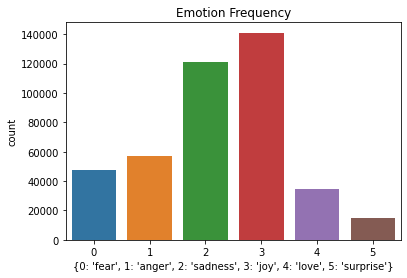

In [77]:
ax = sns.countplot(x='class', data=df)
ax.set(xlabel=num_to_classes,
       title='Emotion Frequency')